## Fibonacci Search

As in the golden section search, our goal is to select usccesive value of $\rho_k$, $0 \leq \rho_k \leq 1/2$ such that only the function evaluation is required at each stage. To derive the strategy for selecting evaluation points consider the figure below.

<img src="./images/fibonacci.png">

It is sufficient to choose $\rho_k$ such that

\begin{align*}
\rho_{k+1}(1-\rho_k)&=1-2\rho_k\\
\rho_{k+1}(1-\rho_k)=(1-\rho_k)-\rho_k\\
\rho_{k+1} = 1 - \frac{\rho_k}{1-\rho_k}
\end{align*}

There are many sequences that satisfy the law of formation above and the condition $0 \le \rho_k \le 1/2$. For example, the sequence $\rho_1 = \rho_2 = \rho_3 = \ldots = 1 - \phi = (3 - \sqrt{5})/2$ satisfies the conditions above and gives rise to the golden section search.

For example,

\begin{align*}
&1 - \frac{3 - \sqrt{5}}{\sqrt{5} - 1}\\
=& 1 - \frac{(3-\sqrt{5})(\sqrt{5} + 1)}{5 - 1}\\
=&1 - \frac{3\sqrt{5} + 3 - 5 - \sqrt{5}}{4}\\
=&1 - \frac{2\sqrt{5} - 2}{4}\\
=&1 - \frac{\sqrt{5} - 1}{2}\\
=&\frac{2 - \sqrt{5} + 1}{2}\\
=&\frac{3 - \sqrt{5}}{2}
\end{align*}

Thus, $\rho_{k+1} = 1-\frac{\rho_k}{1 - \rho_k}$ if $\rho_k = \frac{3 - \sqrt{5}}{2}$ for all $k$.

Suppose, we are given a sequence $\rho_1,\rho_2,\ldots$ satisfying the condition above and we use this sequence in our search algorithm. Then, after $N$ iterations of the algorithm, the search interval is reduced by a factor of

$$(1-\rho_1)(1-\rho_2)\ldots(1-\rho_N)$$

Depending on the sequence $\rho_1,\rho_2,\ldots,\rho_N$ we get a different reduction factor. The natural question is as follows: What sequence $\rho_1,\rho_2,\ldots,\rho_N$ minimization the reduction factor above? This is a constrained optimization problem, that can be formally stated as folows - 

\begin{align*}
\text{Minimize } \quad & (1-\rho_1)(1-\rho_2)\ldots (1-\rho_N)\\
\text{subject to } \quad & \rho_{k+1} = 1 - \frac{\rho_k}{1-\rho_k} && \quad k=1,2,\ldots,N-1\\
& 0 \le \rho_k \le \frac{1}{2} && k=1,2,\ldots,N
\end{align*}

The Fibonacci sequence is given by the recurrence relation:
\begin{align*}
F_{n+1} = \begin{cases}
1 \quad & \text{ if } n = 0,1 \\
F_n + F_{n-1} \quad & \text{ if } n > 1
\end{cases}
\end{align*}

Enlisting the first few elements of the Fibonacci sequence:

\begin{array}{cccccccc}
F_1 & F_2 & F_3 & F_4 & F_5 & F_6 & F_7 &F_8\\
\hline
1 & 2 & 3 & 5 & 8 & 13 & 21 & 34
\end{array}

It turns out that the solution to the constrained optimization problem mentioned above is - 

\begin{align*}
\rho_1 &= 1 - \frac{F_N}{F_{N+1}}\\
\rho_2 &= 1 - \frac{F_{N-1}}{F_{N}}\\
\vdots\\
\rho_k &= 1 - \frac{F_{N-k+1}}{F_{N-k+2}}\\
\vdots\\
\rho_N &= 1 - \frac{F_1}{F_2}
\end{align*}

where $F_k$ is the $k$th fibonacci number. The resulting algorithm is called the Fibonacci search method. We present a proof for the optimality of the Fibonacci search method later in this section.

In the Fibonacci method, the uncertainty range after $N$ iterations is reduced by - 

\begin{align*}
(1-\rho_1)(1-\rho_2)\ldots(1-\rho_N) = \frac{F_N}{F_{N+1}}\cdot \frac{F_{N-1}}{F_N}\cdots\frac{F_1}{F_2} = \frac{1}{F_{N+1}}
\end{align*}

Because the Fibonacci method uses the optimzal values of $\rho_1,\rho_2,\ldots,\rho_N$, the reduction factor above is less than that of the golden section method. In other words, the Fibonacci method converges is better than the Golden Section search method, in that it gives a tighter error bound.

Suppose that we can query $f$ only twice. If we query $f$ on the one-third and two-third points of the interval, then we are guaranteed to remove one-third of our interval, regardless of the function $f$.

<img src="./images/initial_guess.png">

We can guarantee a tighter bracket by moving our guesses towards the center. In the limit as $\epsilon \to 0$, we are guaranteed to shrink our guess by a factor of two as shown in the figure. In other words, as the process converges, our reduction factor approaches $1/2$. The points $c$ and $d$ come really really close to each other.

<img src="./images/max_shrinkage.png">

In any iteration $k$, the search interval is shrunk to $1-\rho_k$ times the original length. 

<img src="./images/iterations.png">

With three queries, we can shrink the interval by a factor of three. We first query $f$ on the one-third and two-third points on the interval, discard one-third of the interval, and then sample just next to the better sample as shown in the figure.

<img src="./images/three_queries.png">

For $n$ queries, the length of the intervals are related to the Fibonacci sequence: $1,1,2,3,5,8,13,\ldots$.

<img src="./images/fibonacci_sequence.png">

We can easily deduce this mathematically. For instance, if $N=5$, 

\begin{align*}
I_2 &= (1- \rho_1) I_1 = \frac{F_5}{F_6}I_1 = \frac{8}{13} I_1\\
I_3 &= (1- \rho_2) I_2 = \frac{F_4}{F_5}I_2 = \frac{5}{8} \cdot \frac{8}{13} I_1\\
I_4 &= (1- \rho_3) I_3 = \frac{F_3}{F_4}I_3 = \frac{3}{5}\cdot \frac{5}{8} \cdot \frac{8}{13} I_1\\
I_5 &= (1- \rho_4) I_4 = \frac{F_2}{F_3}I_4 = \frac{2}{3} \cdot \frac{3}{5}\cdot \frac{5}{8} \cdot \frac{8}{13} I_1\\
I_6 &= (1- \rho_5) I_4 = \frac{F_1}{F_2}I_5 = \frac{1}{2} \cdot \frac{2}{3} \cdot \frac{3}{5}\cdot \frac{5}{8} \cdot \frac{8}{13} I_1 = \frac{1}{13}I_1
\end{align*}

So, clearly $I_1 = I_2 + I_3$, $I_2 = I_3 + I_4$, $\ldots$ and so forth.

The Fibonacci sequence can be determined analytically using Binet's formula:

$$F_n = \frac{\phi^n - (1-\phi)^n}{\sqrt{5}}$$

where $\phi=(1+\sqrt{5})/2 \approx 1.61803$ is the golden ratio.

The ratio between successive values of the Fibonacci sequence is:

$$\frac{F_n}{F_{n-1}} = \phi \left(\frac{1-s^{n+1}}{1-s^n}\right)$$

where $s = (1-\sqrt{5})/(1+\sqrt{5}) \approx -0.382$

In [32]:
function fbs(f, a, b, N)
    
    function F(n)
        # We choose F₀=1, F₁=1, F₂=2, F₃=3, ...
        ϕ = (1 + √5)/2
        Fₙ = (ϕ^(n+1) - (1-ϕ)^(n+1))/√5
        return Fₙ
    end
    
    ρ = 1 - F(N)/F(N+1)
    d = (1-ρ)*b + ρ*a
    fd = f(d)
    
    k = 1
    while k <= N
        c = ρ*b + (1-ρ)*a
        fc = f(c)
        println("k=",k,",a=",a,",c=",c,",d=",d,",b=",b,",fc=",fc,",fd=",fd)
        if (fc < fd)
            d, b, fd = c, d, fc
        else
            a, b = b, c
        end
        
        k = k + 1
        ρ = 1 - F(N - k + 1)/F(N - k + 2)
    end
    return a < b ? (a,b) : (b,a)
end

fbs (generic function with 1 method)

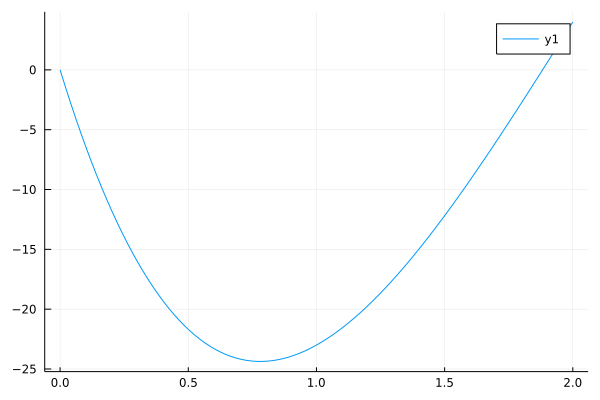

In [12]:
using Plots

f(x) = x^4 - 14*x^3 + 60x^2 - 70*x

x = range(0, stop=2.0, length=100)
y = x->f(x)
plot(x,y)

In [33]:
fbs(f, 0, 2, 4)

k=1,a=0,c=0.75,d=1.25,b=2,fc=-24.33984375,fd=-18.65234375
k=2,a=0,c=0.5000000000000002,d=0.75,b=1.25,fc=-21.6875,fd=-24.33984375
k=3,a=1.25,c=1.0,d=0.75,b=0.5000000000000002,fc=-23.0,fd=-24.33984375
k=4,a=0.5000000000000002,c=0.7500000000000001,d=0.75,b=1.0,fc=-24.339843749999996,fd=-24.33984375


(0.7500000000000001, 1.0)

With $\rho_N=1/2$, the two intermediate points $c,d$ coincide in the middle of the search interval, and therefore we cannot correctly reduce the uncertainty range. To get around this problem, we perform the new evaluation for the last iteration using $\rho_N = 1/2 - \epsilon$, where $\epsilon$ is a small positive real. In other words, the new evaluation point is just to the left or right of the midpoint of the uncertainty interval.

In [39]:
function fbs(f, a, b, N, ϵ=0.01)
    
    function F(n)
        # We choose F₀=1, F₁=1, F₂=2, F₃=3, ...
        ϕ = (1 + √5)/2
        Fₙ = (ϕ^(n+1) - (1-ϕ)^(n+1))/√5
        return Fₙ
    end
    
    ρ = 1 - F(N)/F(N+1)
    d = (1-ρ)*b + ρ*a
    fd = f(d)
    
    k = 1
    while k <= N
        c = ρ*b + (1-ρ)*a
        fc = f(c)

        if (fc < fd)
            d, b, fd = c, d, fc
        else
            a, b = b, c
        end
        
        k = k + 1
        
        if k == N
            ρ = 0.50 - ϵ
        else
            ρ = 1 - F(N - k + 1)/F(N - k + 2)
        end

    end
    return a < b ? (a,b) : (b,a)
end

fbs (generic function with 2 methods)

In [40]:
fbs(f, 0, 2, 4, 0.05)

(0.7250000000000001, 1.0)